## Importing Librabries & Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load datasets
apps = pd.read_csv('apps.csv')
user_reviews = pd.read_csv('user_reviews.csv')

## Clean Data

In [23]:
# check for missing values
print(apps.isnull().sum())
print(user_reviews.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [25]:
#handle missing values
#dropping rows with missing values

apps = apps.dropna()
user_reviews = user_reviews.dropna()

In [39]:
#checking for duplicate value
## no duplicates values were found
duplicates = apps.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
9651    False
9652    False
9654    False
9655    False
9658    False
Length: 7021, dtype: bool


## Correct Data Types

In [50]:
#checking data types
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [64]:
#convert data types
# Converting columns to appropriate data types
apps.loc[:, 'Price'] = apps['Price'].str.replace('$', '').astype(float)
apps.loc[:, 'Size'] = apps['Size'].str.replace('M', '').astype(float)

AttributeError: Can only use .str accessor with string values!

## Explore App Categories

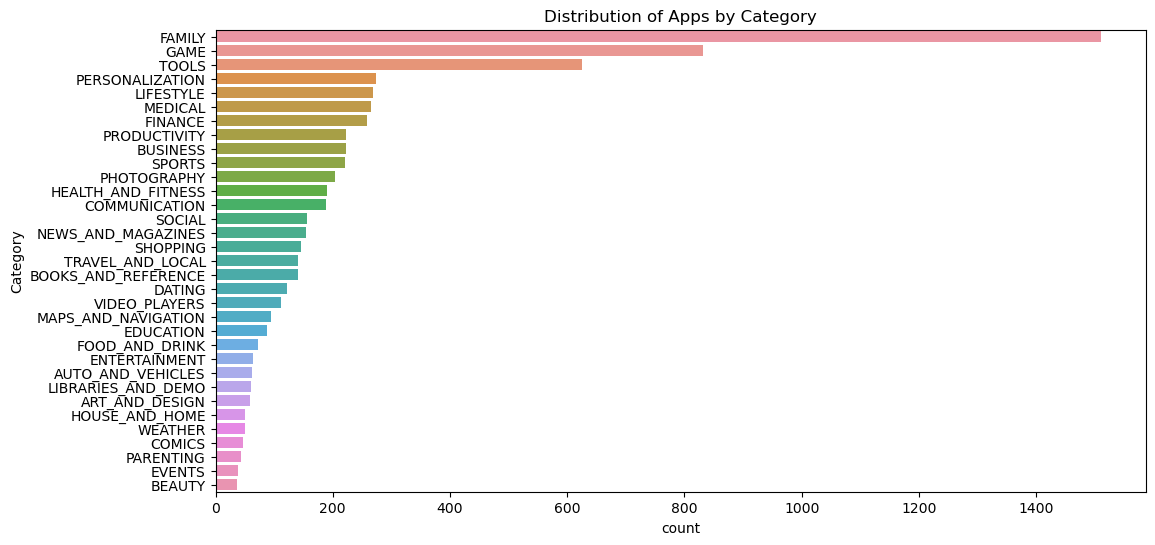

In [130]:
#distribution of apps across categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=apps, order=apps['Category'].value_counts().index)
plt.title('Distribution of Apps by Category')
plt.savefig('distribution_of_apps_by_category.png') #save figure as png
plt.show()

## Understand the distribution of app ratings, size, popularity and price

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


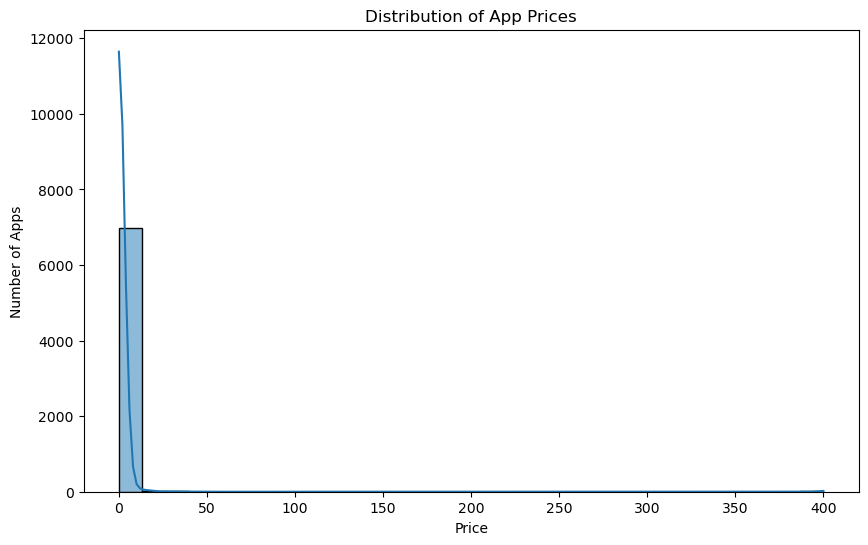

In [85]:
# Visualization of App Prices

plt.figure(figsize=(10, 6))
sns.histplot(apps['Price'], bins=30, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Number of Apps')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


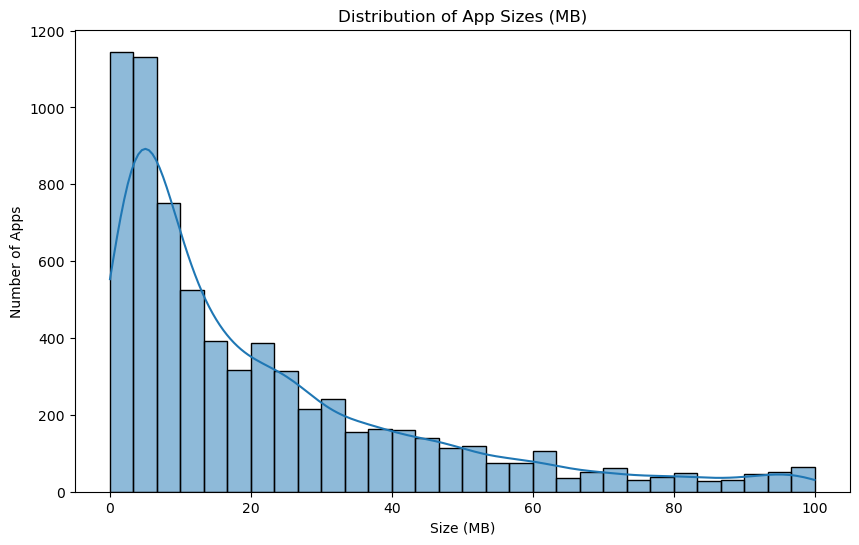

In [87]:
#visualization of app sizes

plt.figure(figsize=(10, 6))
sns.histplot(apps['Size'], bins=30, kde=True)
plt.title('Distribution of App Sizes (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


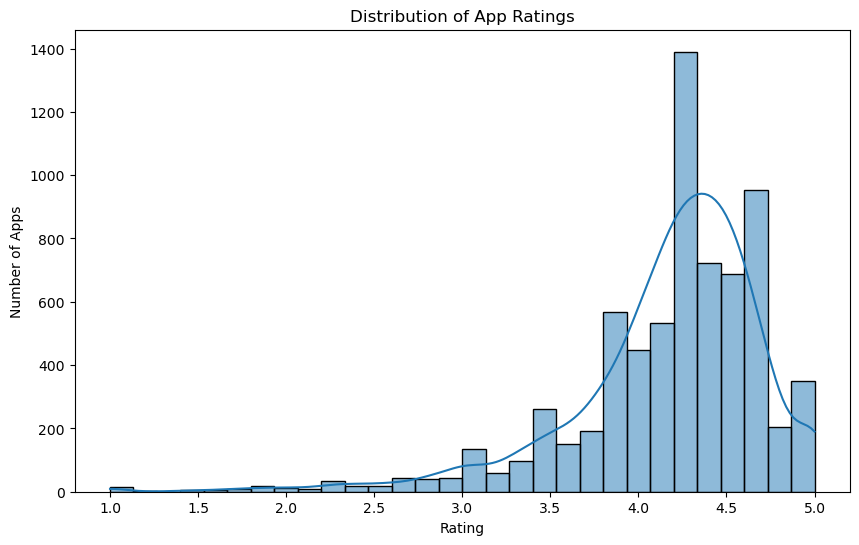

In [93]:
# visualization of app ratings

plt.figure(figsize=(10, 6))
sns.histplot(apps['Rating'], bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


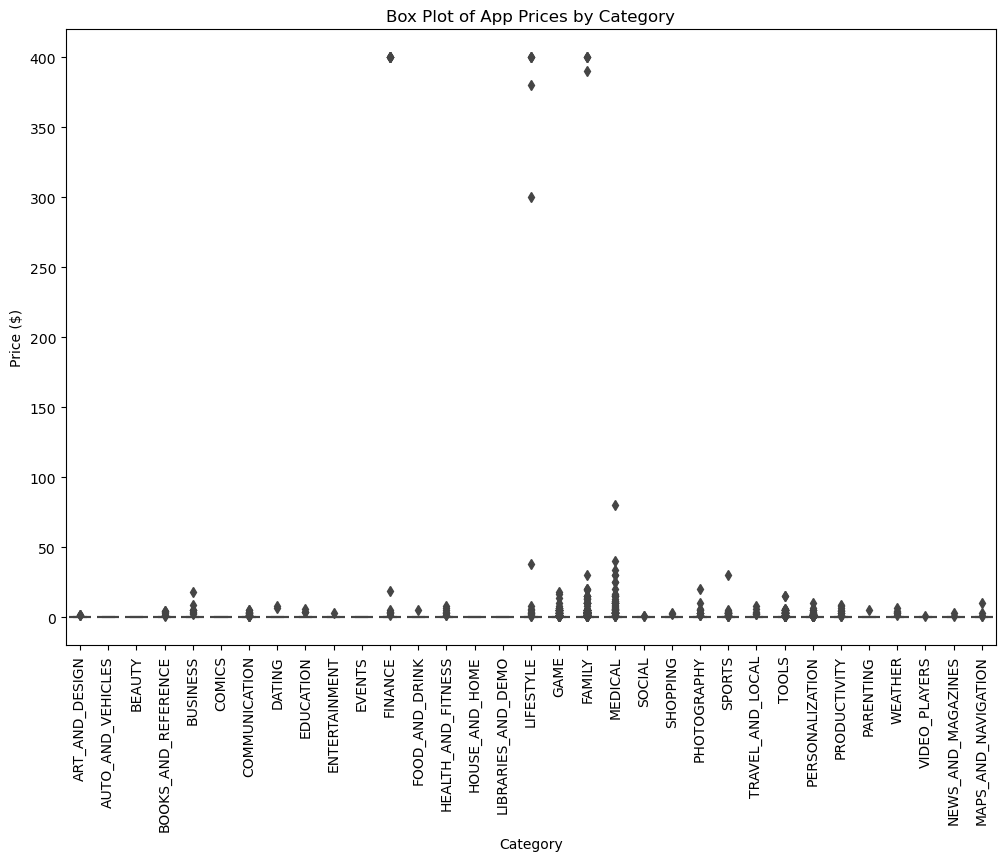

In [95]:
#Box Plot of app prices by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Price', data=apps)
plt.xticks(rotation=90)
plt.title('Box Plot of App Prices by Category')
plt.xlabel('Category')
plt.ylabel('Price ($)')
plt.show()

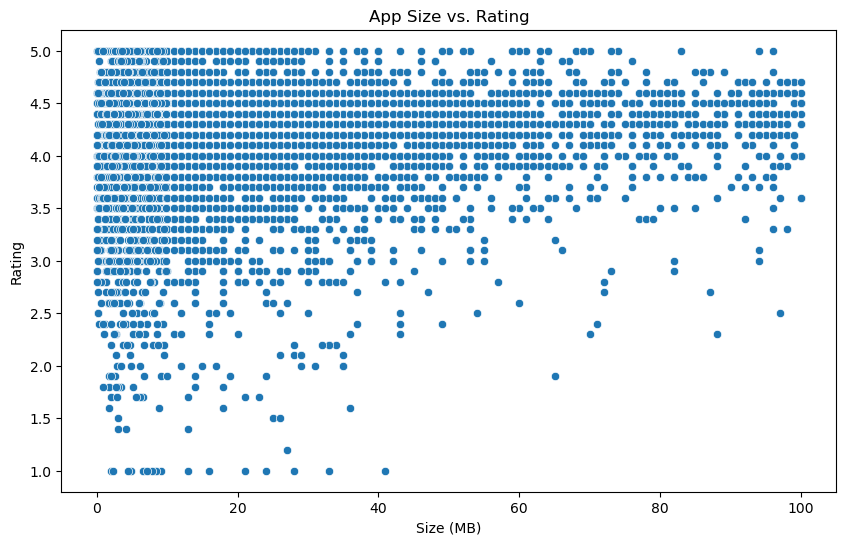

In [97]:
#Scatter plot of size vs rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=apps)
plt.title('App Size vs. Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


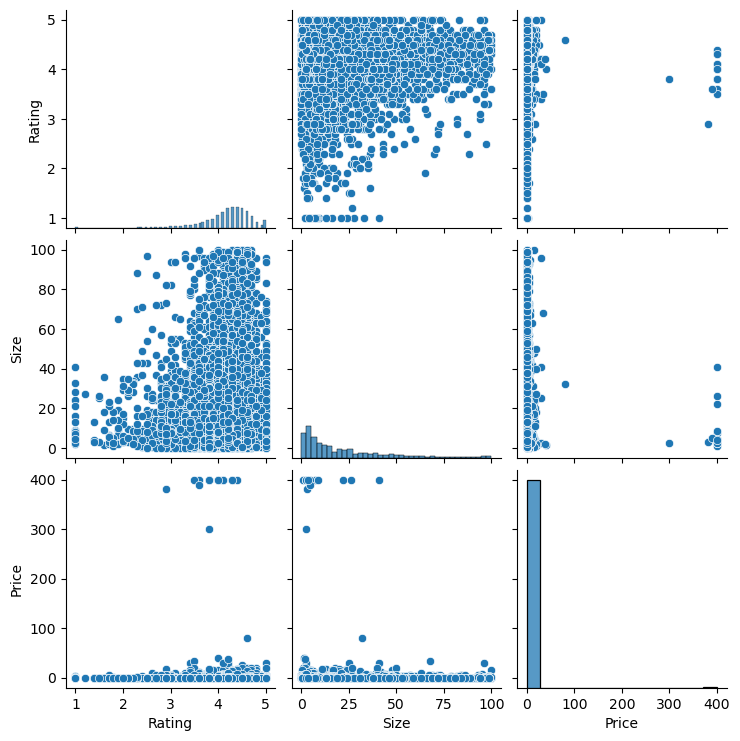

In [116]:
#pair plot for multiple variables
sns.pairplot(apps[['Rating', 'Size', 'Price']])
plt.show()

## Sentiment Analysis

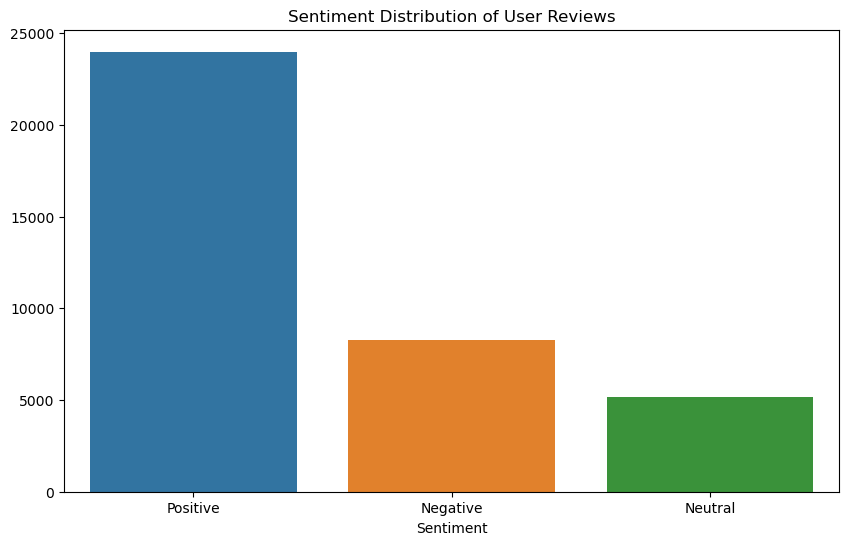

In [114]:
sentiment_counts = user_reviews['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of User Reviews')
plt.show()